In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/human-age-prediction-synthetic-dataset/Train.csv
/kaggle/input/human-age-prediction-synthetic-dataset/Test.csv


In [2]:
df = pd.read_csv('/kaggle/input/human-age-prediction-synthetic-dataset/Train.csv')

# Data Overview

In [3]:
df.head()

,Gender,Height (cm),Weight (kg),Blood Pressure (s/d),Cholesterol Level (mg/dL),BMI,Blood Glucose Level (mg/dL),Bone Density (g/cm²),Vision Sharpness,Hearing Ability (dB),...,Family History,Cognitive Function,Mental Health Status,Sleep Patterns,Stress Levels,Pollution Exposure,Sun Exposure,Education Level,Income Level,Age (years)
0,Male,171.148359,86.185197,151/109,259.465814,29.423017,157.652848,0.132868,0.200000,58.786198,...,NaN,44.059172,Good,Insomnia,2.797064,5.142344,7.108975,NaN,Medium,89
1,Male,172.946206,79.641937,134/112,263.630292,26.626847,118.507805,0.629534,0.267312,54.635270,...,Heart Disease,45.312298,Good,Normal,9.339930,7.272720,3.918489,Undergraduate,Medium,77
2,Female,155.945488,49.167058,160/101,207.846206,20.217553,143.587550,0.473487,0.248667,54.564632,...,Hypertension,56.246991,Poor,Insomnia,9.234637,8.500386,5.393408,NaN,Medium,70
3,Female,169.078298,56.017921,133/94,253.283779,19.595270,137.448581,1.184315,0.513818,79.722963,...,Hypertension,55.196092,Poor,Insomnia,4.693446,7.555511,2.745578,NaN,Low,52
4,Female,163.758355,73.966304,170/106,236.119899,27.582078,145.328695,0.434562,0.306864,52.479469,...,NaN,53.023379,Good,Normal,4.038537,9.429097,3.878435,Undergraduate,High,79


In [4]:
df.rename(columns={
    'Gender': 'Gender',
    'Height (cm)': 'Height',
    'Weight (kg)': 'Weight',
    'Blood Pressure (s/d)': 'Blood_Pressure',
    'Cholesterol Level (mg/dL)': 'Cholesterol',
    'BMI': 'BMI',
    'Blood Glucose Level (mg/dL)': 'Blood_Glucose',
    'Bone Density (g/cm²)': 'Bone_Density',
    'Vision Sharpness': 'Vision',
    'Hearing Ability (dB)': 'Hearing',
    'Physical Activity Level': 'Physical_Activity',
    'Smoking Status': 'Smoking',
    'Alcohol Consumption': 'Alcohol',
    'Diet': 'Diet',
    'Chronic Diseases': 'Chronic_Diseases',
    'Medication Use': 'Medication',
    'Family History': 'Family_History',
    'Cognitive Function': 'Cognitive_Function',
    'Mental Health Status': 'Mental_Health',
    'Sleep Patterns': 'Sleep',
    'Stress Levels': 'Stress',
    'Pollution Exposure': 'Pollution',
    'Sun Exposure': 'Sun_Exposure',
    'Education Level': 'Education',
    'Income Level': 'Income',
    'Age (years)': 'Age'
}, inplace=True)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              3000 non-null   object 
 1   Height              3000 non-null   float64
 2   Weight              3000 non-null   float64
 3   Blood_Pressure      3000 non-null   object 
 4   Cholesterol         3000 non-null   float64
 5   BMI                 3000 non-null   float64
 6   Blood_Glucose       3000 non-null   float64
 7   Bone_Density        3000 non-null   float64
 8   Vision              3000 non-null   float64
 9   Hearing             3000 non-null   float64
 10  Physical_Activity   3000 non-null   object 
 11  Smoking             3000 non-null   object 
 12  Alcohol             1799 non-null   object 
 13  Diet                3000 non-null   object 
 14  Chronic_Diseases    1701 non-null   object 
 15  Medication          1802 non-null   object 
 16  Family

In [6]:
df.head(3)

,Gender,Height,Weight,Blood_Pressure,Cholesterol,BMI,Blood_Glucose,Bone_Density,Vision,Hearing,...,Family_History,Cognitive_Function,Mental_Health,Sleep,Stress,Pollution,Sun_Exposure,Education,Income,Age
0,Male,171.148359,86.185197,151/109,259.465814,29.423017,157.652848,0.132868,0.200000,58.786198,...,NaN,44.059172,Good,Insomnia,2.797064,5.142344,7.108975,NaN,Medium,89
1,Male,172.946206,79.641937,134/112,263.630292,26.626847,118.507805,0.629534,0.267312,54.635270,...,Heart Disease,45.312298,Good,Normal,9.339930,7.272720,3.918489,Undergraduate,Medium,77
2,Female,155.945488,49.167058,160/101,207.846206,20.217553,143.587550,0.473487,0.248667,54.564632,...,Hypertension,56.246991,Poor,Insomnia,9.234637,8.500386,5.393408,NaN,Medium,70


In [7]:
df.shape

(3000, 26)

In [8]:
df.isnull().sum()

Gender                   0
Height                   0
Weight                   0
Blood_Pressure           0
Cholesterol              0
BMI                      0
Blood_Glucose            0
Bone_Density             0
Vision                   0
Hearing                  0
Physical_Activity        0
Smoking                  0
Alcohol               1201
Diet                     0
Chronic_Diseases      1299
Medication            1198
Family_History        1451
Cognitive_Function       0
Mental_Health            0
Sleep                    0
Stress                   0
Pollution                0
Sun_Exposure             0
Education              627
Income                   0
Age                      0
dtype: int64

In [9]:
# Filling NaN with their most frequent values
for column in df.columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [10]:
df.isnull().sum()

Gender                0
Height                0
Weight                0
Blood_Pressure        0
Cholesterol           0
BMI                   0
Blood_Glucose         0
Bone_Density          0
Vision                0
Hearing               0
Physical_Activity     0
Smoking               0
Alcohol               0
Diet                  0
Chronic_Diseases      0
Medication            0
Family_History        0
Cognitive_Function    0
Mental_Health         0
Sleep                 0
Stress                0
Pollution             0
Sun_Exposure          0
Education             0
Income                0
Age                   0
dtype: int64

In [11]:
df.describe()

,Height,Weight,Cholesterol,BMI,Blood_Glucose,Bone_Density,Vision,Hearing,Cognitive_Function,Stress,Pollution,Sun_Exposure,Age
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,168.590835,72.537260,234.029794,25.550146,126.653909,0.931899,0.474591,47.016214,63.868376,5.476507,5.028982,5.955785,53.485667
std,9.293006,13.190734,24.521436,4.367322,18.226124,0.443550,0.209726,14.336464,11.755738,2.584901,2.871408,3.474595,20.569690
min,141.130985,32.537672,148.811514,12.049900,69.866884,-0.219787,0.200000,0.000000,30.382098,1.000428,0.006395,0.002055,18.000000
25%,161.629515,63.222773,216.756601,22.454115,114.392605,0.561063,0.281671,36.734775,55.647794,3.221745,2.607185,2.873285,36.000000
50%,168.215632,71.448651,234.376822,25.352113,126.802186,0.939585,0.462070,46.963733,64.014652,5.496618,5.095686,5.956789,53.000000
75%,175.522665,81.702801,250.646674,28.403543,139.377079,1.294570,0.639498,56.828847,72.087453,7.680320,7.476338,8.991349,72.000000
max,198.112215,123.598603,331.300589,43.329869,185.736144,1.999829,1.062537,94.003824,106.479831,9.996323,9.998090,11.992504,89.000000


In [12]:
df[df.duplicated()]

,Gender,Height,Weight,Blood_Pressure,Cholesterol,BMI,Blood_Glucose,Bone_Density,Vision,Hearing,...,Family_History,Cognitive_Function,Mental_Health,Sleep,Stress,Pollution,Sun_Exposure,Education,Income,Age


# Visualization

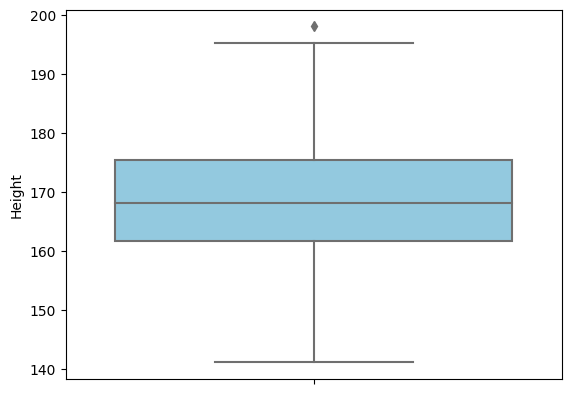

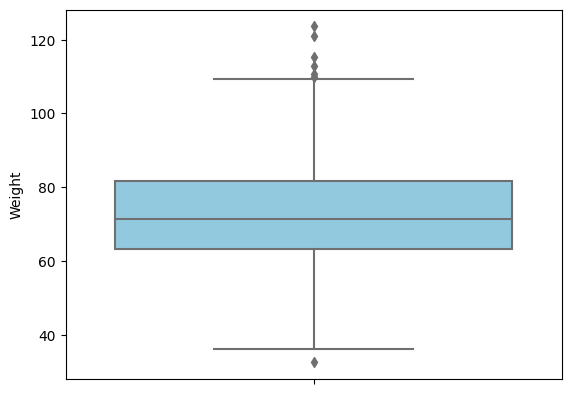

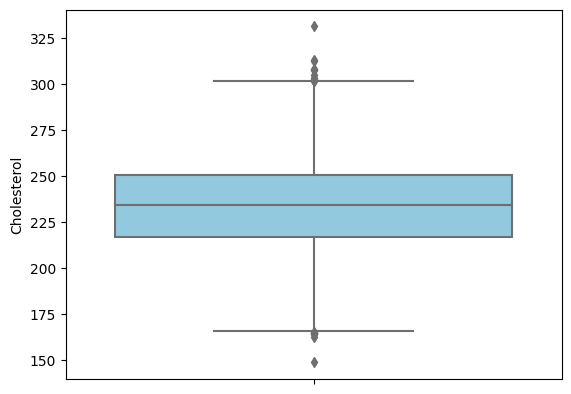

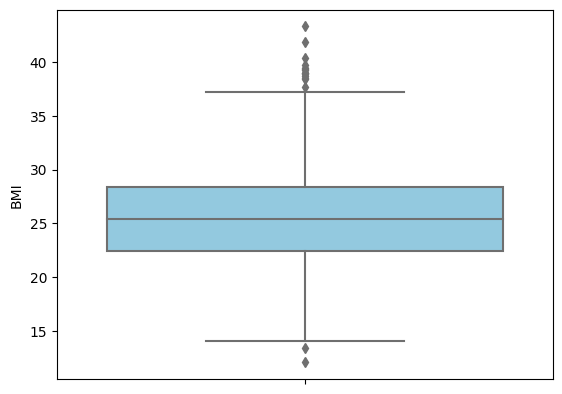

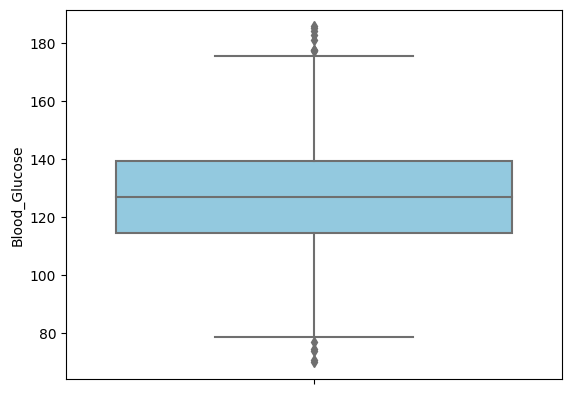

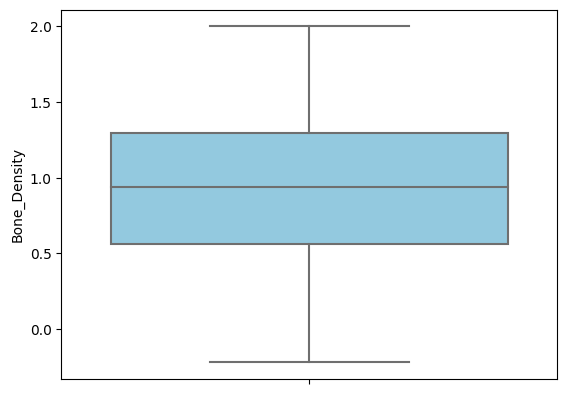

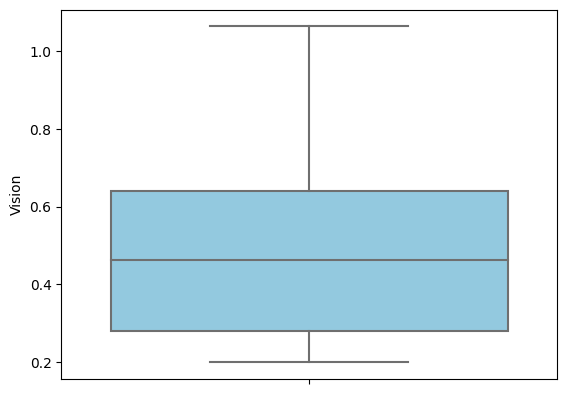

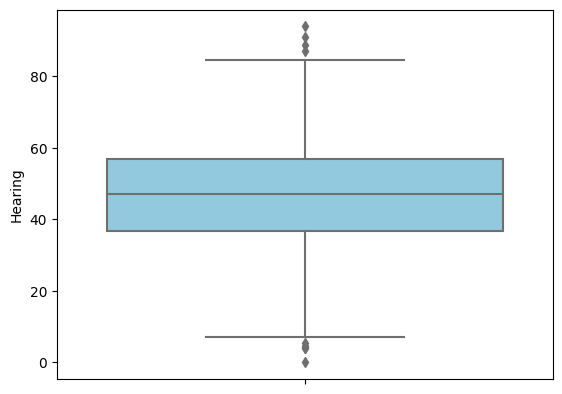

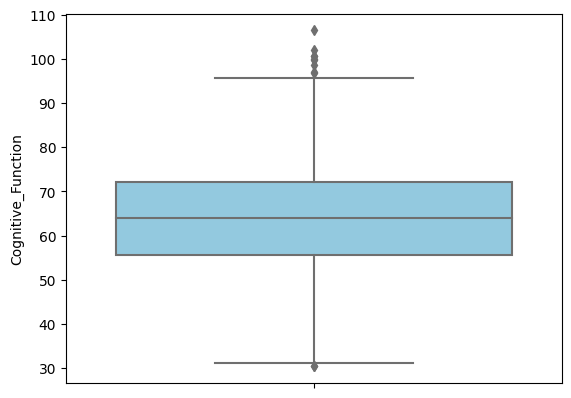

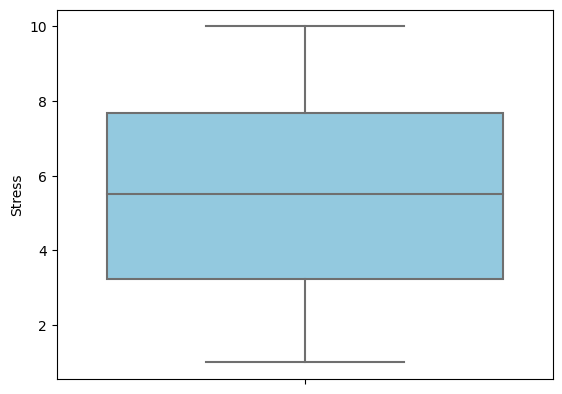

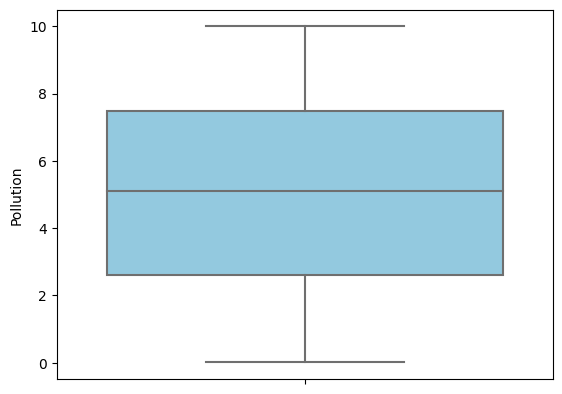

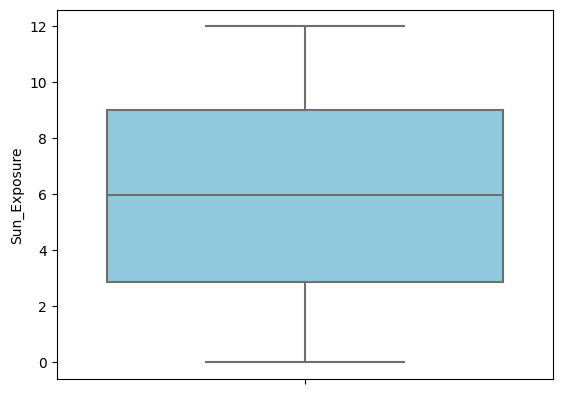

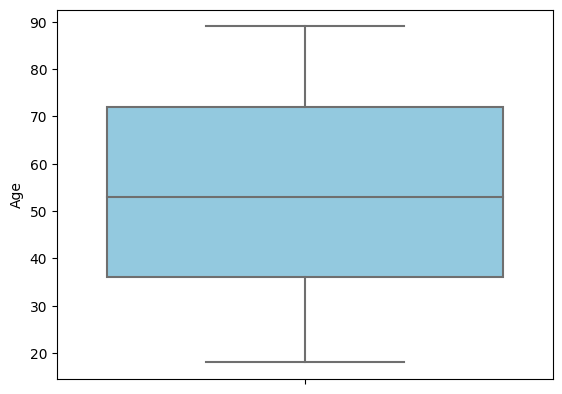

In [13]:
for col in df.select_dtypes(exclude = 'object'):
    sns.boxplot(y = df[col], color = 'skyblue')
    plt.show()

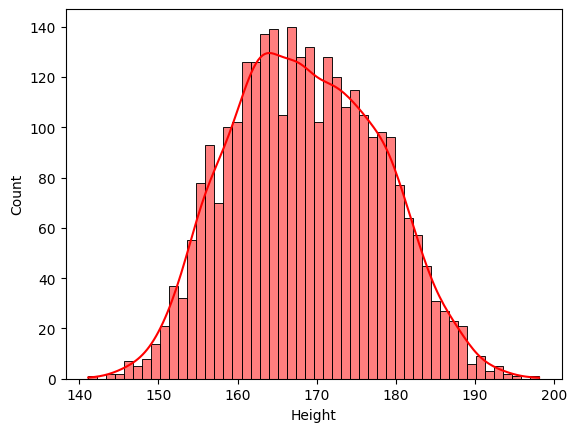

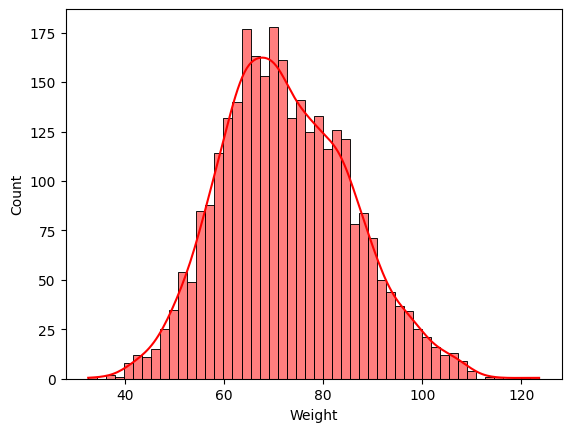

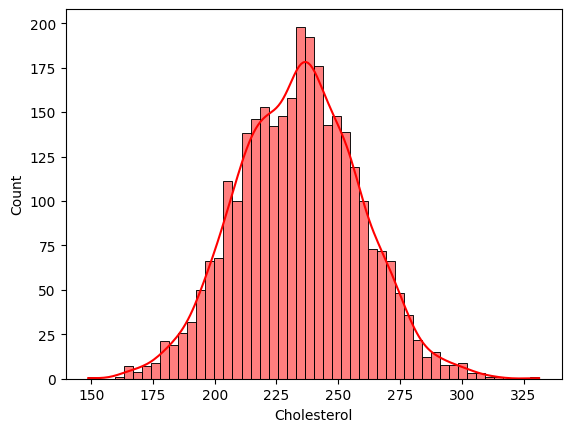

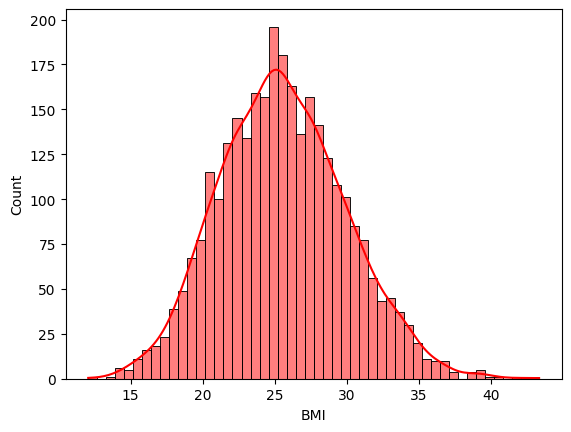

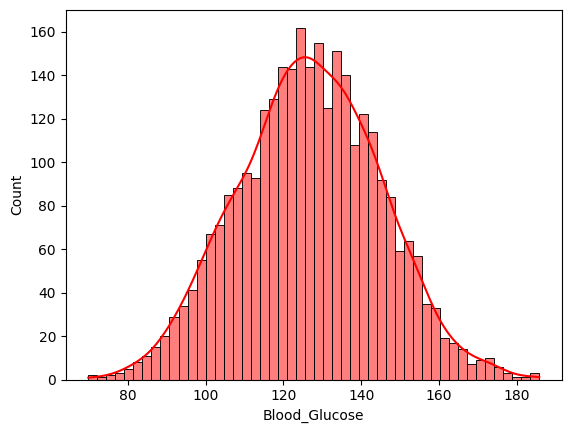

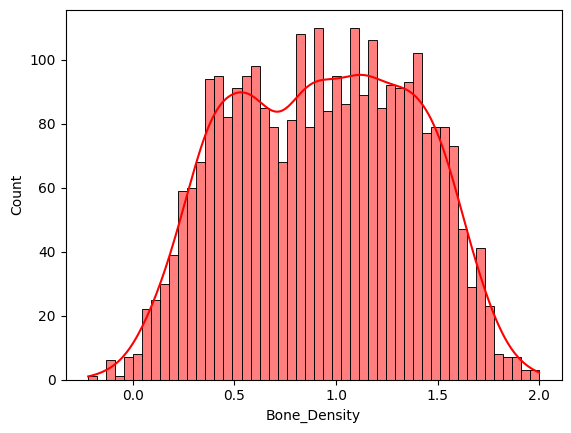

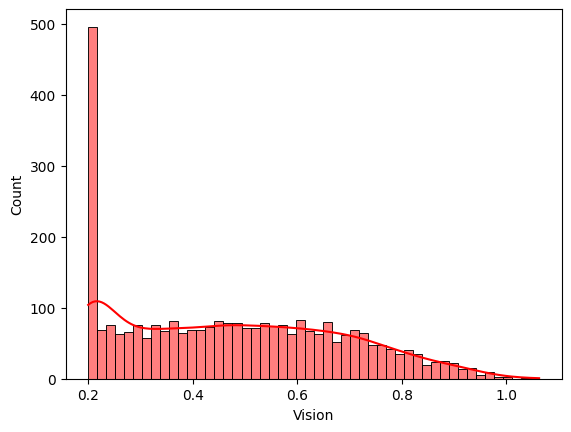

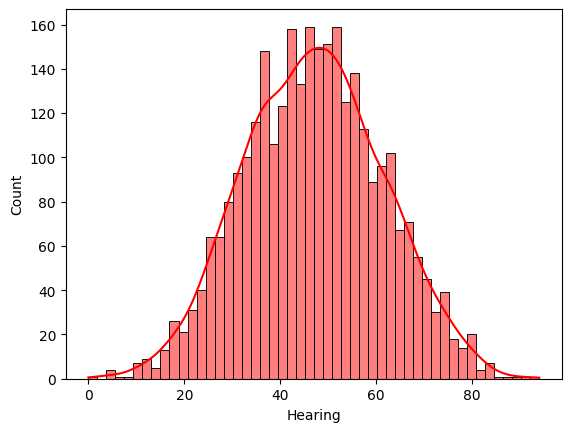

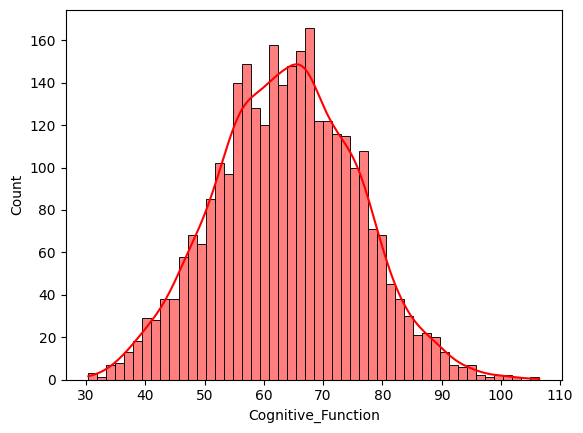

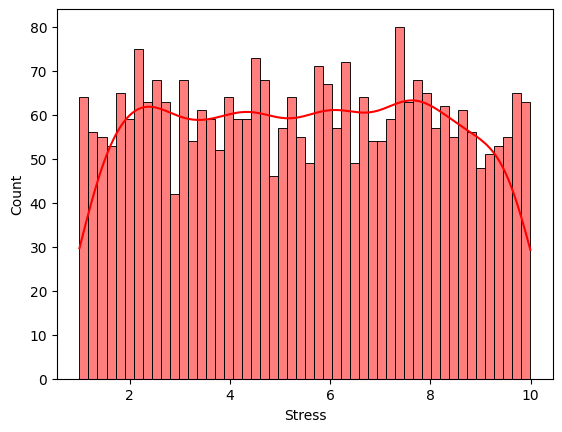

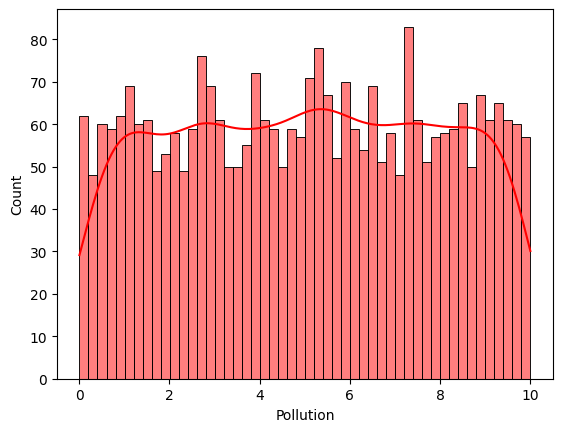

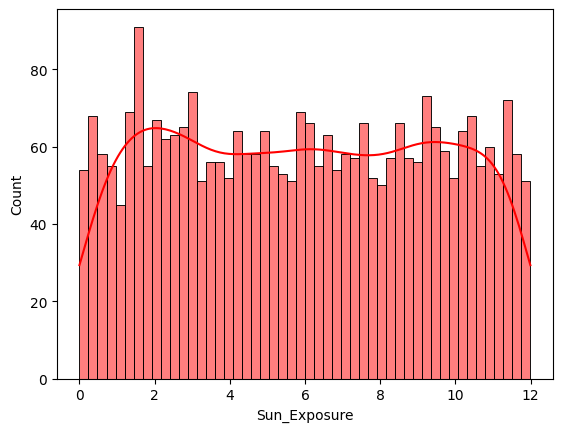

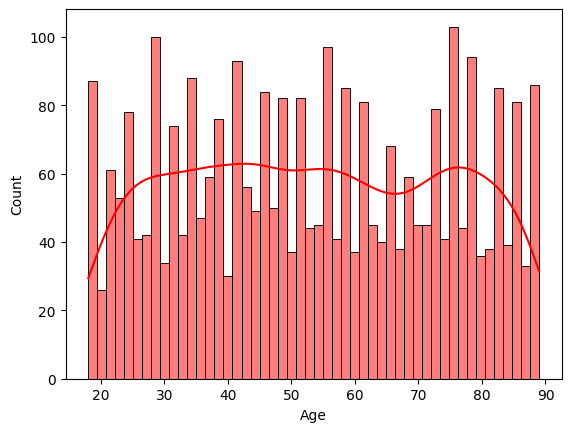

In [14]:
for col in df.select_dtypes(exclude = 'object'):
    sns.histplot(x = df[col], bins = 50, kde =True, color='red')
    plt.show()

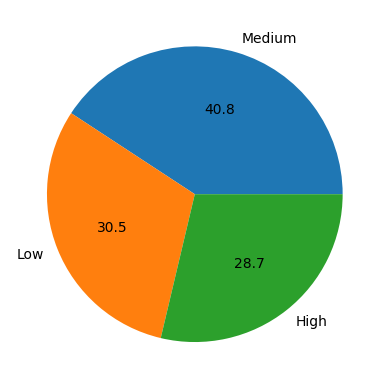

In [15]:
df['Income'].value_counts().plot(kind = 'pie', autopct = '%.1f')
plt.ylabel(None)
plt.show()

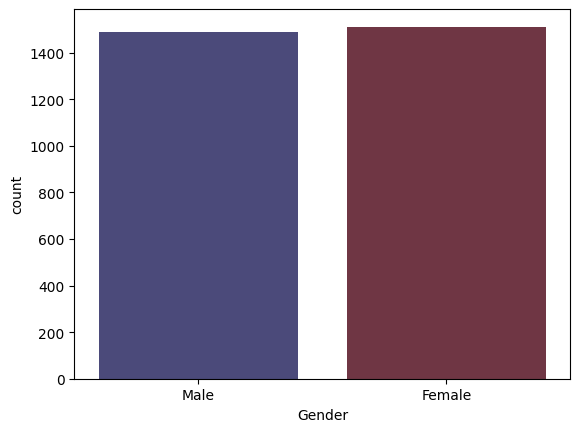

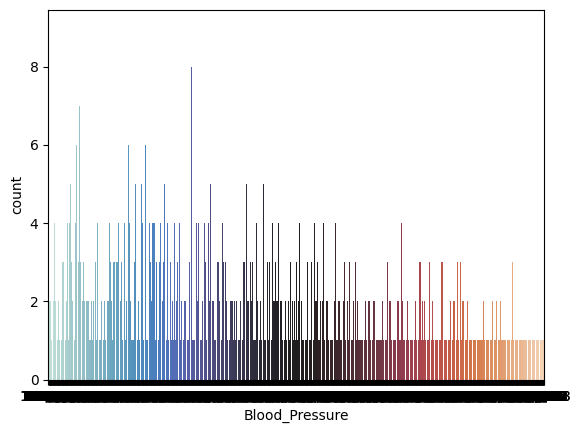

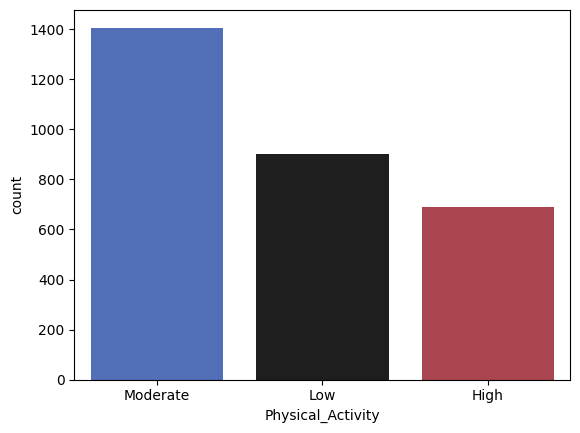

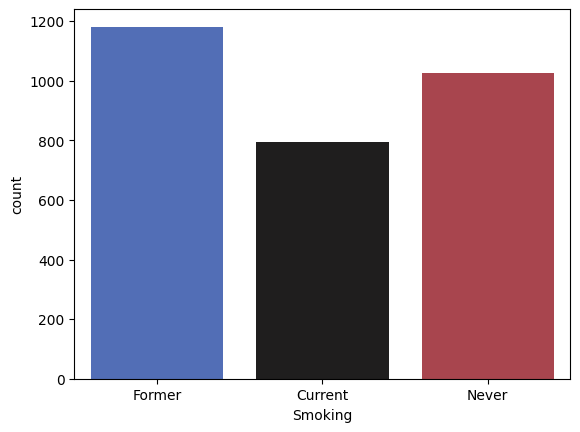

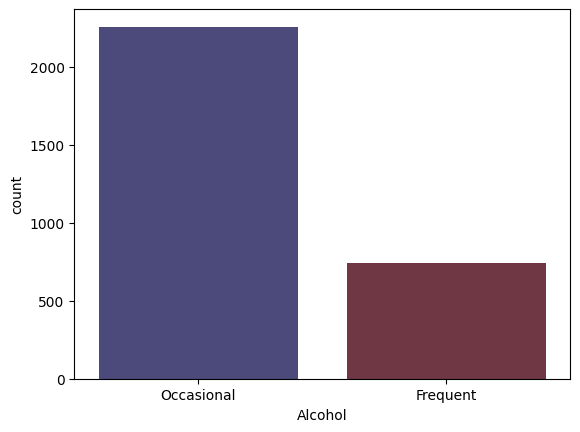

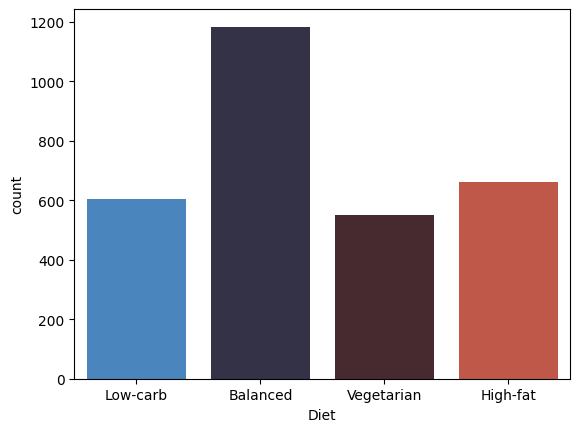

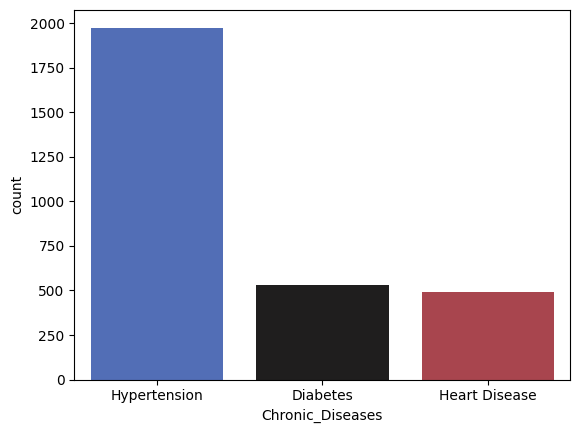

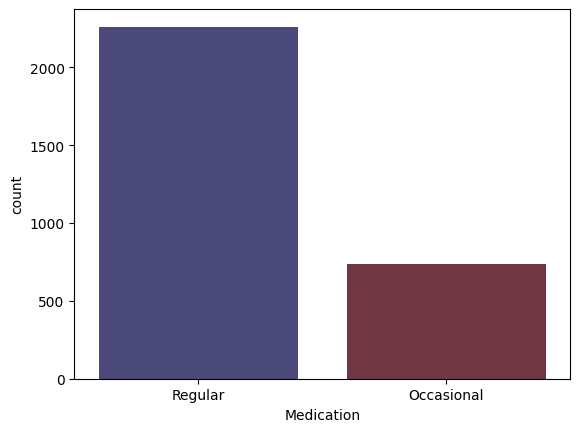

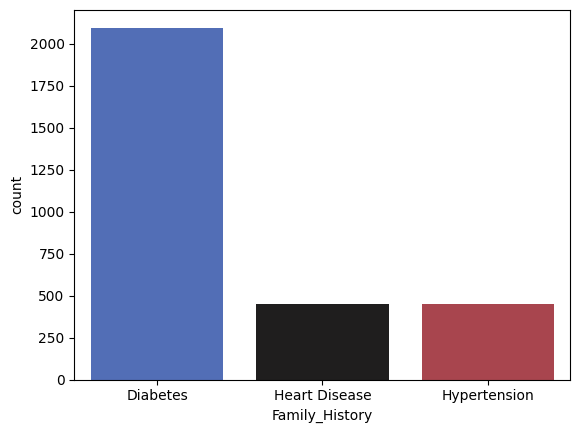

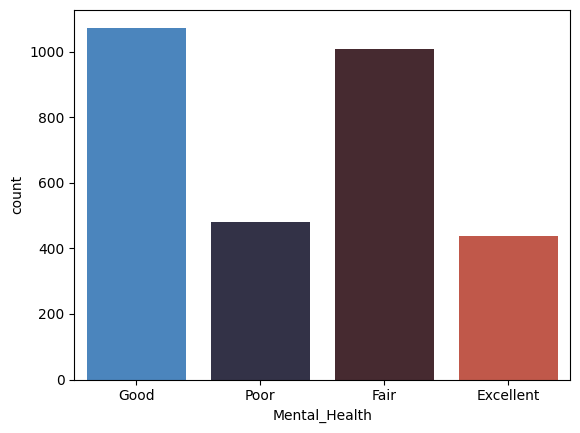

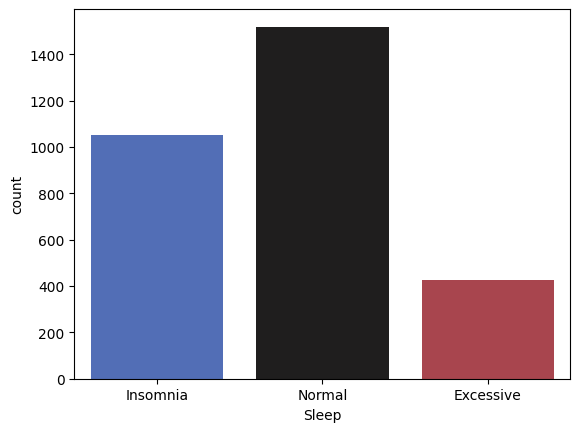

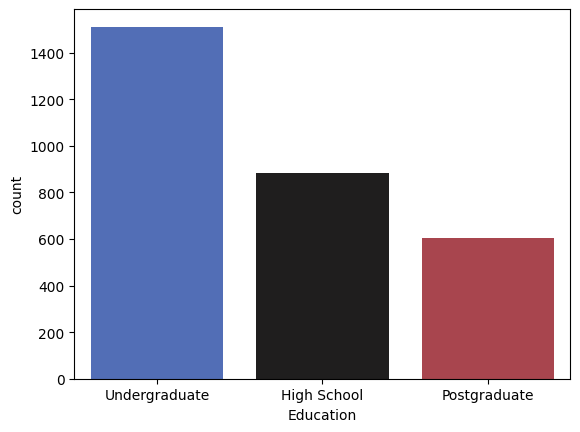

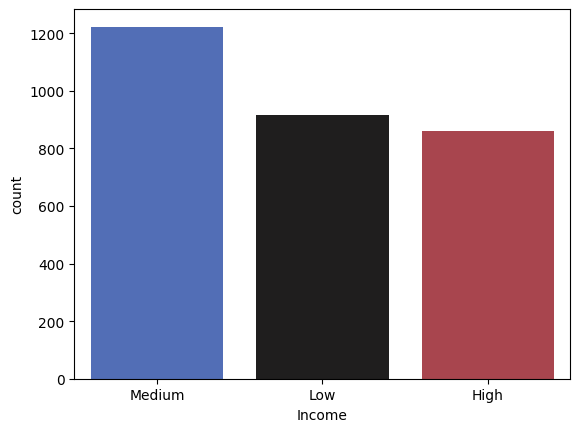

In [16]:
for col in df.select_dtypes(include = 'object'):
    sns.countplot(x = df[col], palette = 'icefire')
    plt.show()

<Axes: xlabel='Income', ylabel='Blood_Glucose'>

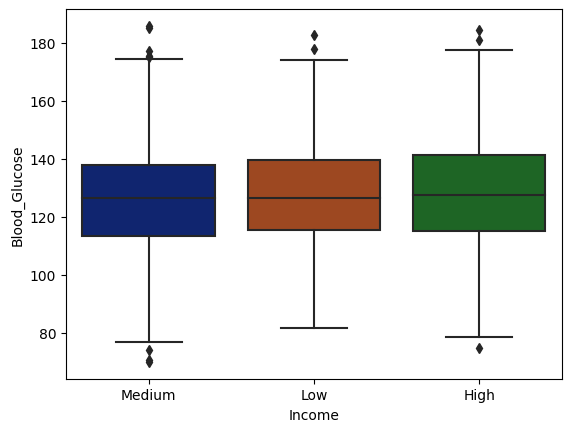

In [17]:
sns.boxplot(x = 'Income' , y = 'Blood_Glucose', data =df, palette = 'dark')

# Correlation

<Axes: >

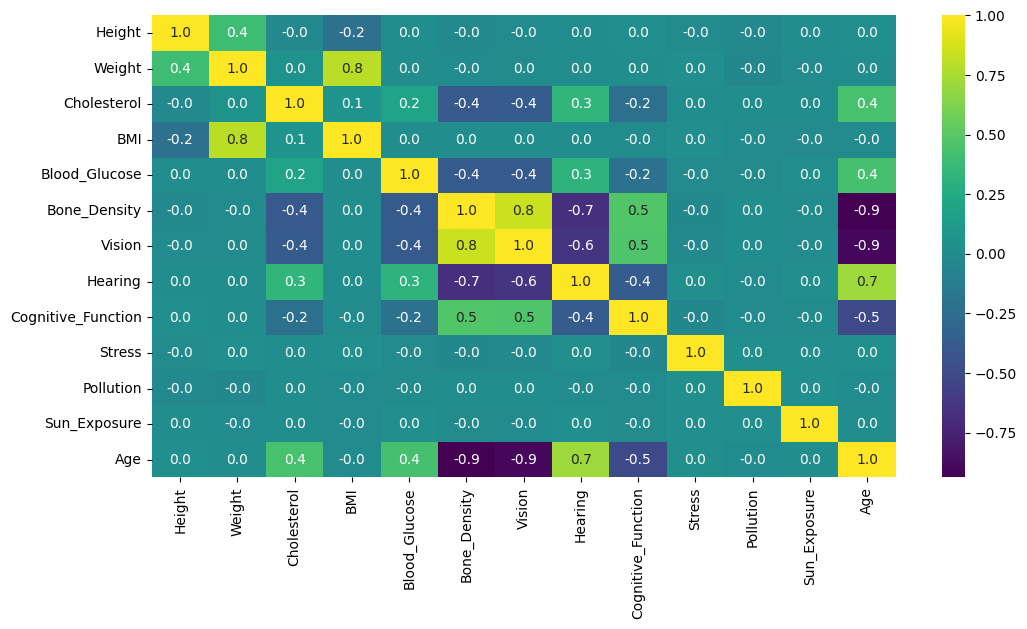

In [18]:
plt.figure(figsize=(12,6))
sns.heatmap(df.select_dtypes(exclude= ['object']).corr(), annot = True, cmap = 'viridis', fmt = '.1f')

# Interpretation

Bone Density vs Vision & Age: There is a strong negative correlation between bone density and vision sharpness (-0.9) as well as bone density and age (-0.9). This suggests that as age increases or vision sharpness declines, bone density tends to decrease.

BMI vs Weight: There is a strong positive correlation between BMI and weight (0.8), which makes sense as BMI is partly calculated from weight.

Vision vs Hearing: Vision sharpness has a strong negative correlation with hearing ability (-0.6), which could indicate that people with reduced vision tend to have reduced hearing ability as well.

Cognitive Function vs Vision & Hearing: Cognitive function is positively correlated with both vision sharpness (0.5) and hearing ability (0.5), suggesting that better cognitive function might be associated with better sensory abilities.

Age vs Hearing & Cholesterol: Age has a moderate positive correlation with cholesterol (0.4) and hearing (0.7), suggesting that as age increases, cholesterol levels and hearing impairments might increase.

Bone Density vs Hearing: There is a positive correlation between bone density and hearing (0.7), indicating that people with better bone density tend to have better hearing abilities.

BMI vs Cholesterol: There is a weak positive correlation between BMI and cholesterol (0.1), indicating a slight relationship where higher BMI may be associated with higher cholesterol levels.

In [19]:
df_new = df.drop('Blood_Pressure', axis = 1)

In [20]:
df_new.head()

,Gender,Height,Weight,Cholesterol,BMI,Blood_Glucose,Bone_Density,Vision,Hearing,Physical_Activity,...,Family_History,Cognitive_Function,Mental_Health,Sleep,Stress,Pollution,Sun_Exposure,Education,Income,Age
0,Male,171.148359,86.185197,259.465814,29.423017,157.652848,0.132868,0.200000,58.786198,Moderate,...,Diabetes,44.059172,Good,Insomnia,2.797064,5.142344,7.108975,Undergraduate,Medium,89
1,Male,172.946206,79.641937,263.630292,26.626847,118.507805,0.629534,0.267312,54.635270,Low,...,Heart Disease,45.312298,Good,Normal,9.339930,7.272720,3.918489,Undergraduate,Medium,77
2,Female,155.945488,49.167058,207.846206,20.217553,143.587550,0.473487,0.248667,54.564632,Moderate,...,Hypertension,56.246991,Poor,Insomnia,9.234637,8.500386,5.393408,Undergraduate,Medium,70
3,Female,169.078298,56.017921,253.283779,19.595270,137.448581,1.184315,0.513818,79.722963,Moderate,...,Hypertension,55.196092,Poor,Insomnia,4.693446,7.555511,2.745578,Undergraduate,Low,52
4,Female,163.758355,73.966304,236.119899,27.582078,145.328695,0.434562,0.306864,52.479469,Low,...,Diabetes,53.023379,Good,Normal,4.038537,9.429097,3.878435,Undergraduate,High,79


# Linear Regression

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [22]:
le = LabelEncoder()
scaler = StandardScaler()

In [23]:
x = df_new.drop('Age', axis = 1)
y = df['Age']

In [24]:
numerical_cols = x.select_dtypes(exclude=['object']).columns

In [25]:
x[numerical_cols] = scaler.fit_transform(x[numerical_cols])

In [26]:
x.head(3)

,Gender,Height,Weight,Cholesterol,BMI,Blood_Glucose,Bone_Density,Vision,Hearing,Physical_Activity,...,Medication,Family_History,Cognitive_Function,Mental_Health,Sleep,Stress,Pollution,Sun_Exposure,Education,Income
0,Male,0.275255,1.034833,1.037470,0.886932,1.701081,-1.801746,-1.309503,0.821119,Moderate,...,Regular,Diabetes,-1.685348,Good,Insomnia,-1.036748,0.039486,0.331947,Undergraduate,Medium
1,Male,0.468750,0.538701,1.207329,0.246577,-0.447021,-0.681807,-0.988497,0.531535,Low,...,Regular,Heart Disease,-1.578733,Good,Normal,1.494861,0.781537,-0.586438,Undergraduate,Medium
2,Female,-1.360965,-1.772009,-1.067962,-1.221225,0.929241,-1.033680,-1.077411,0.526607,Moderate,...,Regular,Hypertension,-0.648420,Poor,Insomnia,1.454120,1.209157,-0.161881,Undergraduate,Medium


Now we would label encode the category type variables

In [27]:
for col in x.select_dtypes(include = ['object']):
    x[col] = le.fit_transform(x[col])

In [28]:
x.head()

,Gender,Height,Weight,Cholesterol,BMI,Blood_Glucose,Bone_Density,Vision,Hearing,Physical_Activity,...,Medication,Family_History,Cognitive_Function,Mental_Health,Sleep,Stress,Pollution,Sun_Exposure,Education,Income
0,1,0.275255,1.034833,1.037470,0.886932,1.701081,-1.801746,-1.309503,0.821119,2,...,1,0,-1.685348,2,1,-1.036748,0.039486,0.331947,2,2
1,1,0.468750,0.538701,1.207329,0.246577,-0.447021,-0.681807,-0.988497,0.531535,1,...,1,1,-1.578733,2,2,1.494861,0.781537,-0.586438,2,2
2,0,-1.360965,-1.772009,-1.067962,-1.221225,0.929241,-1.033680,-1.077411,0.526607,2,...,1,2,-0.648420,3,1,1.454120,1.209157,-0.161881,2,2
3,0,0.052464,-1.252553,0.785321,-1.363735,0.592362,0.569177,0.187074,2.281748,2,...,0,2,-0.737829,3,1,-0.302987,0.880039,-0.924062,2,1
4,0,-0.520099,0.108355,0.085250,0.465336,1.024787,-1.121453,-0.799873,0.381138,1,...,1,0,-0.922682,2,2,-0.556389,1.532645,-0.597968,2,0


In [29]:
y

0       89
1       77
2       70
3       52
4       79
        ..
2995    22
2996    19
2997    85
2998    30
2999    66
Name: Age, Length: 3000, dtype: int64

In [30]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [31]:
x_train.shape,x_test.shape

((2400, 24), (600, 24))

# Training the Model

In [32]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

# Evaluating Accuracy

In [33]:
y_pred = lr.predict(x_test)

In [34]:
mean_absolute_error(y_test,y_pred)

4.464268968693059

In [35]:
mse = mean_squared_error(y_test,y_pred)
mse

31.06289920046013

In [36]:
# Root Mean Squared Error
mse**0.5

5.573410015462717

In [37]:
# Coefficients
lr.coef_

array([ 2.53616035e-01, -7.88417730e-01,  1.23770556e+00,  8.37692178e-01,
       -1.32714488e+00,  6.30110072e-01, -1.14070302e+01, -6.53721162e+00,
        2.12405740e+00,  2.75062885e-01, -2.62547455e-01,  7.76757438e-02,
        3.26898835e-02, -1.83175148e-01, -1.32999900e-01, -8.52604031e-03,
       -7.50627167e-01,  5.25277380e-02, -1.49333206e-01,  1.74444690e-02,
       -3.04001874e-02, -6.35679627e-02, -7.77714722e-02,  8.78459865e-04])

In [38]:
#Intercept
lr.intercept_

53.81271187193555

In [39]:
r2_score(y_test,y_pred)

0.9241989491810416

R2 score = 92.41 % 

In [40]:
y_test.head(5)

1801    67
1190    59
1817    52
251     67
2505    49
Name: Age, dtype: int64

In [41]:
y_pred[0:5]

array([70.08893784, 52.58667204, 45.79655649, 61.19799213, 51.6526246 ])

# OLS

In [42]:
import statsmodels.formula.api as smf

In [43]:
df_new

,Gender,Height,Weight,Cholesterol,BMI,Blood_Glucose,Bone_Density,Vision,Hearing,Physical_Activity,...,Family_History,Cognitive_Function,Mental_Health,Sleep,Stress,Pollution,Sun_Exposure,Education,Income,Age
0,Male,171.148359,86.185197,259.465814,29.423017,157.652848,0.132868,0.200000,58.786198,Moderate,...,Diabetes,44.059172,Good,Insomnia,2.797064,5.142344,7.108975,Undergraduate,Medium,89
1,Male,172.946206,79.641937,263.630292,26.626847,118.507805,0.629534,0.267312,54.635270,Low,...,Heart Disease,45.312298,Good,Normal,9.339930,7.272720,3.918489,Undergraduate,Medium,77
2,Female,155.945488,49.167058,207.846206,20.217553,143.587550,0.473487,0.248667,54.564632,Moderate,...,Hypertension,56.246991,Poor,Insomnia,9.234637,8.500386,5.393408,Undergraduate,Medium,70
3,Female,169.078298,56.017921,253.283779,19.595270,137.448581,1.184315,0.513818,79.722963,Moderate,...,Hypertension,55.196092,Poor,Insomnia,4.693446,7.555511,2.745578,Undergraduate,Low,52
4,Female,163.758355,73.966304,236.119899,27.582078,145.328695,0.434562,0.306864,52.479469,Low,...,Diabetes,53.023379,Good,Normal,4.038537,9.429097,3.878435,Undergraduate,High,79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,Male,161.632502,88.323405,204.175510,33.807917,112.075747,1.583006,0.665907,27.997736,Moderate,...,Diabetes,57.820282,Fair,Normal,8.091897,9.846088,9.111205,Undergraduate,High,22
2996,Male,163.443512,93.217007,197.384424,34.894725,101.177692,1.785129,0.720304,32.866623,Low,...,Heart Disease,68.783715,Good,Normal,2.427081,1.141303,8.578184,Undergraduate,Medium,19
2997,Male,177.857644,86.258847,238.641542,27.268332,110.548146,0.366012,0.200000,39.756270,Moderate,...,Diabetes,50.133807,Fair,Normal,7.671837,5.101134,2.199199,Undergraduate,Low,85
2998,Female,162.287164,41.371018,198.244328,15.708252,123.704379,1.452963,0.648158,43.338594,Moderate,...,Hypertension,68.864629,Good,Insomnia,7.920076,4.452130,5.051613,Undergraduate,High,30


**based on the earlier correlation , we have choosen some attributes which have pos or neg correl withj age**

In [44]:
model = smf.ols('Age ~ Gender + Height + Bone_Density + Vision + Hearing + Cognitive_Function + Stress + Physical_Activity', data=df_new)
results = model.fit()

In [45]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    Age   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     4215.
Date:                Sun, 08 Sep 2024   Prob (F-statistic):               0.00
Time:                        15:23:51   Log-Likelihood:                -9403.1
No. Observations:                3000   AIC:                         1.883e+04
Df Residuals:                    2990   BIC:                         1.889e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

# Interpretaion

### Model Overview:
- **R-squared**: 0.927 – This indicates that approximately 92.7% of the variance in "Age" is explained by the independent variables in the model. The model has a high explanatory power.
- **Adj. R-squared**: 0.927 – This is very close to the R-squared value, showing that adding new predictors did not overfit the model.
- **F-statistic**: 4215 – This large value, along with a **Prob(F-statistic)** of 0.00, indicates that the model as a whole is statistically significant.

### Coefficients and Interpretation:
- **Intercept (89.8644)** – This represents the predicted age when all other variables are at their baseline levels.
- **Gender[T.Male] (0.0610)** – The coefficient is positive but not statistically significant (p-value = 0.835), meaning gender does not significantly influence age in this model.
- **Physical_Activity[T.Low] (0.2872)** – A positive coefficient but not significant (p-value = 0.308), indicating no strong evidence that low physical activity impacts age.
- **Physical_Activity[T.Moderate] (0.4596)** – Close to significance (p-value = 0.076), this suggests that moderate physical activity might positively affect age but is not definitive.
- **Height (0.0065)** – Not significant (p-value = 0.678), meaning height does not have a substantial effect on predicting age.
- **Bone_Density (-26.0485)** – Highly significant (p-value = 0.000), this negative coefficient suggests that lower bone density is strongly associated with a younger age.
- **Vision (-33.0361)** – Highly significant (p-value = 0.000), showing that poor vision strongly correlates with a younger age.
- **Hearing (0.1512)** – Significant (p-value = 0.000), indicating that better hearing is associated with older age.
- **Cognitive_Function (-0.0760)** – Significant (p-value = 0.000), showing that better cognitive function predicts a younger age.
- **Stress (-0.0211)** – Not significant (p-value = 0.593), indicating no substantial impact of stress on age.

### Model Diagnostics:
- **Durbin-Watson (2.038)** – This value close to 2 suggests there is no strong autocorrelation in the residuals.
- **Omnibus, Jarque-Bera, Prob(Omnibus), Prob(JB)** – The non-significant p-values indicate that the residuals are normally distributed.
- **Condition No. (4.98e+03)** – This large value suggests potential multicollinearity among the independent variables.

### Summary:
- Variables like **Bone Density**, **Vision**, **Hearing**, and **Cognitive Function** are statistically significant predictors of age.
- Other factors like **Gender**, **Height**, **Stress**, and **Physical Activity** (to some extent) do not show significant impacts on age.
- The model is overall significant and explains a large proportion of variance in the dependent variable, but there may be some multicollinearity concerns.

